# 6.2 Exploring Relationships 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

### Importing Data

In [2]:
# Define path
path = r'C:\Users\ariel\OneDrive\Desktop\School work\Achievement 6'

In [3]:
# Importing data set
df = pd.read_csv(os.path.join(path, 'Data', 'cardatacleaned.csv'))

### Variables for exploratory visual analysis

In [4]:
df.shape

(6976702, 40)

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Source', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Year', 'Month', 'Day'],
      dtype='object')

In [37]:
df.head()

Unnamed: 0   ID   Source  Severity           Start_Time  \
0           0  A-1  Source2         3  2016-02-08 05:46:00   
1           1  A-2  Source2         2  2016-02-08 06:07:59   
2           2  A-3  Source2         2  2016-02-08 06:49:27   
3           3  A-4  Source2         3  2016-02-08 07:23:34   
4           4  A-5  Source2         2  2016-02-08 07:39:07   

              End_Time  Start_Lat  Start_Lng  Distance(mi)  \
0  2016-02-08 11:00:00  39.865147 -84.058723          0.01   
1  2016-02-08 06:37:59  39.928059 -82.831184          0.01   
2  2016-02-08 07:19:27  39.063148 -84.032608          0.01   
3  2016-02-08 07:53:34  39.747753 -84.205582          0.01   
4  2016-02-08 08:09:07  39.627781 -84.188354          0.01   

                                         Description  ...   Stop  \
0  Right lane blocked due to accident on I-70 Eas...  ...  False   
1  Accident on Brice Rd at Tussing Rd. Expect del...  ...  False   
2  Accident on OH-32 State Route 32 Westbound at ...  ...  False   
3  Accident on I-75 Southbound at Exits 52 52B US...  ...  False   
4  Accident on McEwen Rd at OH-725 Miamisburg Cen...  ...  False   

  Traffic_Calming Traffic_Signal Turning_Loop  Year Month  Day  \
0           False          False        False  2016     2    8   
1           False          False        False  2016     2    8   
2           False           True        False  2016     2    8   
3           False          False        False  2016     2    8   
4           False           True        False  2016     2    8   

   Severity Scale     Weather_Category  Temperature_Category  
0        Moderate        Rainy/Drizzly              Moderate  
1        Moderate        Rainy/Drizzly              Moderate  
2        Moderate      Cloudy/Overcast              Moderate  
3        Moderate  Clear/Partly Cloudy              Moderate  
4        Moderate  Clear/Partly Cloudy              Moderate  

[5 rows x 43 columns]

### Correlation Matrix Heatmap

In [6]:
# Selecting relevant numeric columns
numeric_columns = ['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                   'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Year', 'Month', 'Day']

In [7]:
corr = df[numeric_columns].corr()

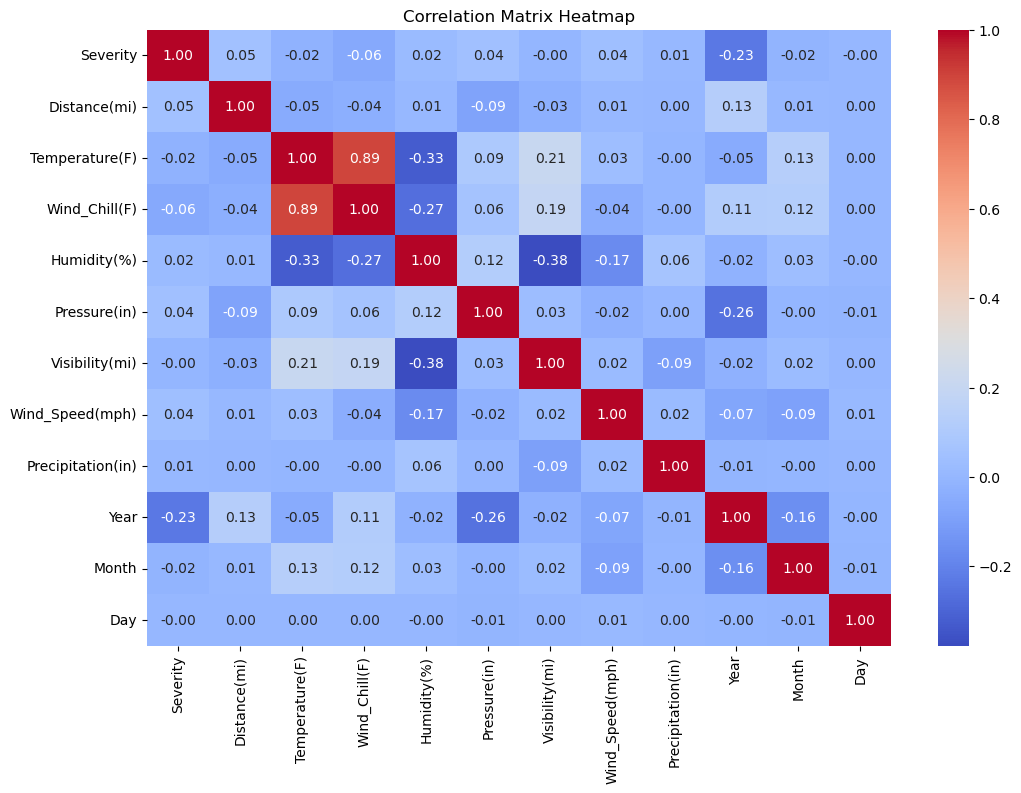

In [8]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

The strongest relationships are between Temperature, Wind Chill, and Humidity. Relationships between weather variables themselves are not necessarily important to this analysis, because I want to know how they affect car crashes. The highest correlation with severity is year. This does not necessarily mean that weather is not a contributing factor to this car accident data, but there is no strong relationship to severity. 

### Scatterplots for Variables with the Strongest Correlations

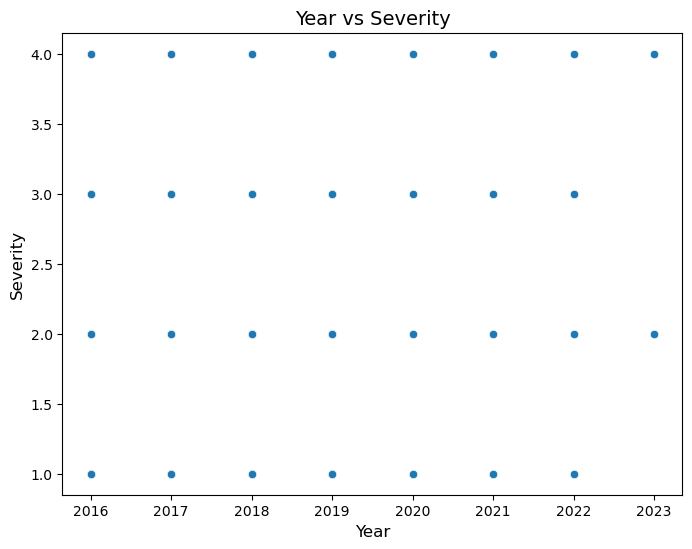

In [9]:
# Create the scatter plot for Year vs Severity
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x='Year', y='Severity', data=df)
plt.title("Year vs Severity", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Severity", fontsize=12)
plt.show()

This shows that year is not significant to severity.

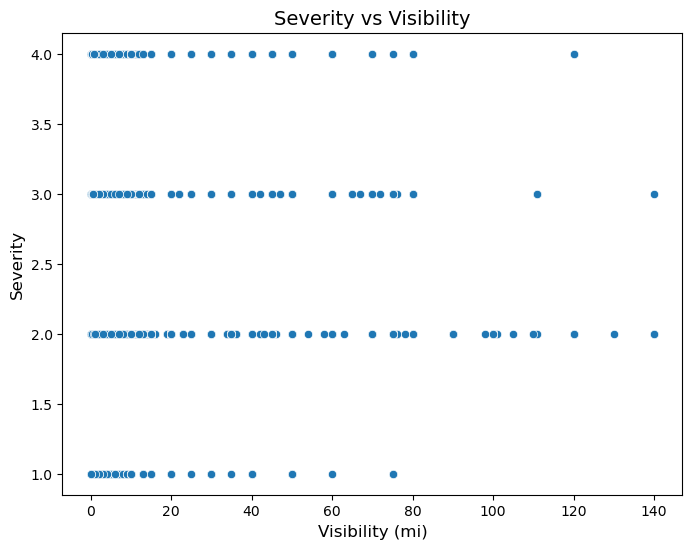

In [10]:
# Create a scatter plot for Severity vs Visibility
plt.figure(figsize=(8, 6))  
sns.scatterplot(x='Visibility(mi)', y='Severity', data=df)
plt.title("Severity vs Visibility", fontsize=14)
plt.xlabel("Visibility (mi)", fontsize=12)
plt.ylabel("Severity", fontsize=12)
plt.show()

There are clusters of data for each severity at the low visibility (0-20 miles). This doesn't show a relationship between severity and visibility, but it does show a relationship between low visibility and car accidents.

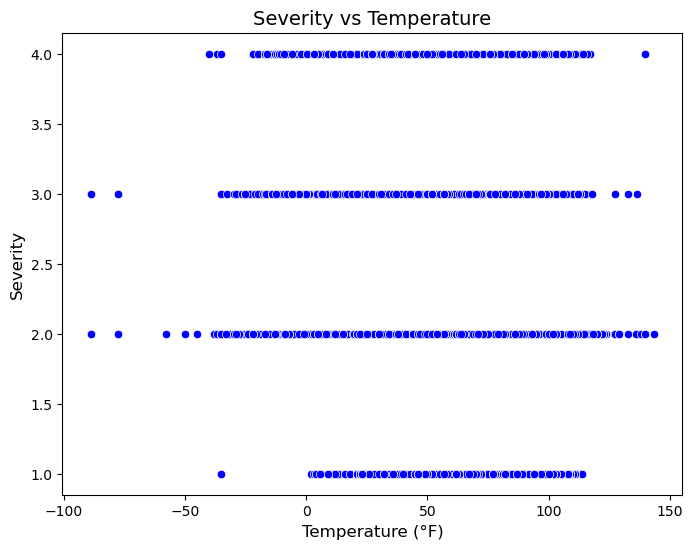

In [11]:
# Create a scatter plot for Severity vs Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature(F)', y='Severity', data=df, color='blue')
plt.title("Severity vs Temperature", fontsize=14)
plt.xlabel("Temperature (°F)", fontsize=12)
plt.ylabel("Severity", fontsize=12)
plt.show()

No significant insights from temperature and severity.

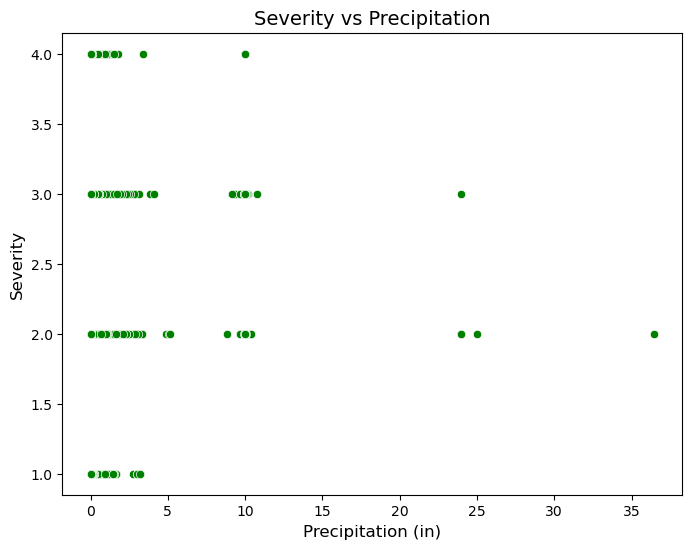

In [12]:
# Create a scatter plot for Severity vs Precipitation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Precipitation(in)', y='Severity', data=df, color='green')
plt.title("Severity vs Precipitation", fontsize=14)
plt.xlabel("Precipitation (in)", fontsize=12)
plt.ylabel("Severity", fontsize=12)
plt.show()

Precipitation may affect severity and the number of car crashes. This is something that should be explored further. 

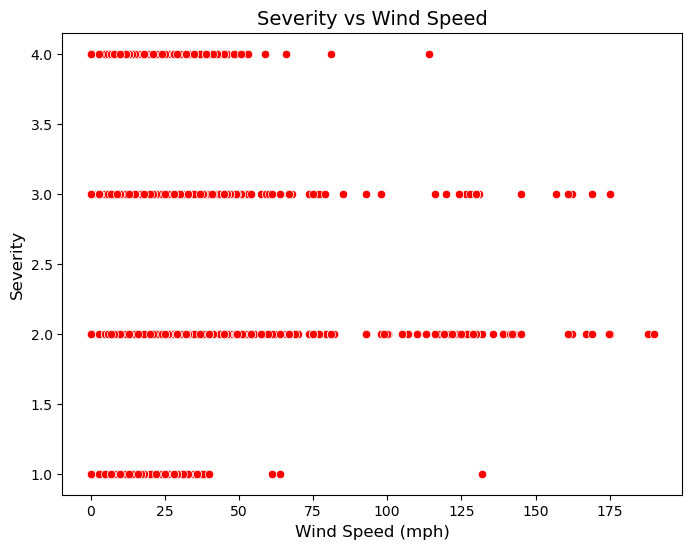

In [13]:
# Create a scatter plot for Severity vs Wind Speed
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Wind_Speed(mph)', y='Severity', data=df, color='red')
plt.title("Severity vs Wind Speed", fontsize=14)
plt.xlabel("Wind Speed (mph)", fontsize=12)
plt.ylabel("Severity", fontsize=12)
plt.show()

There is potential relationship between wind speed and severity, this is something that could be explored further.

### Pair Plot

In [14]:
sub = df[['Severity', 'Year', 'Wind_Chill(F)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Pressure(in)', 'Precipitation(in)']]

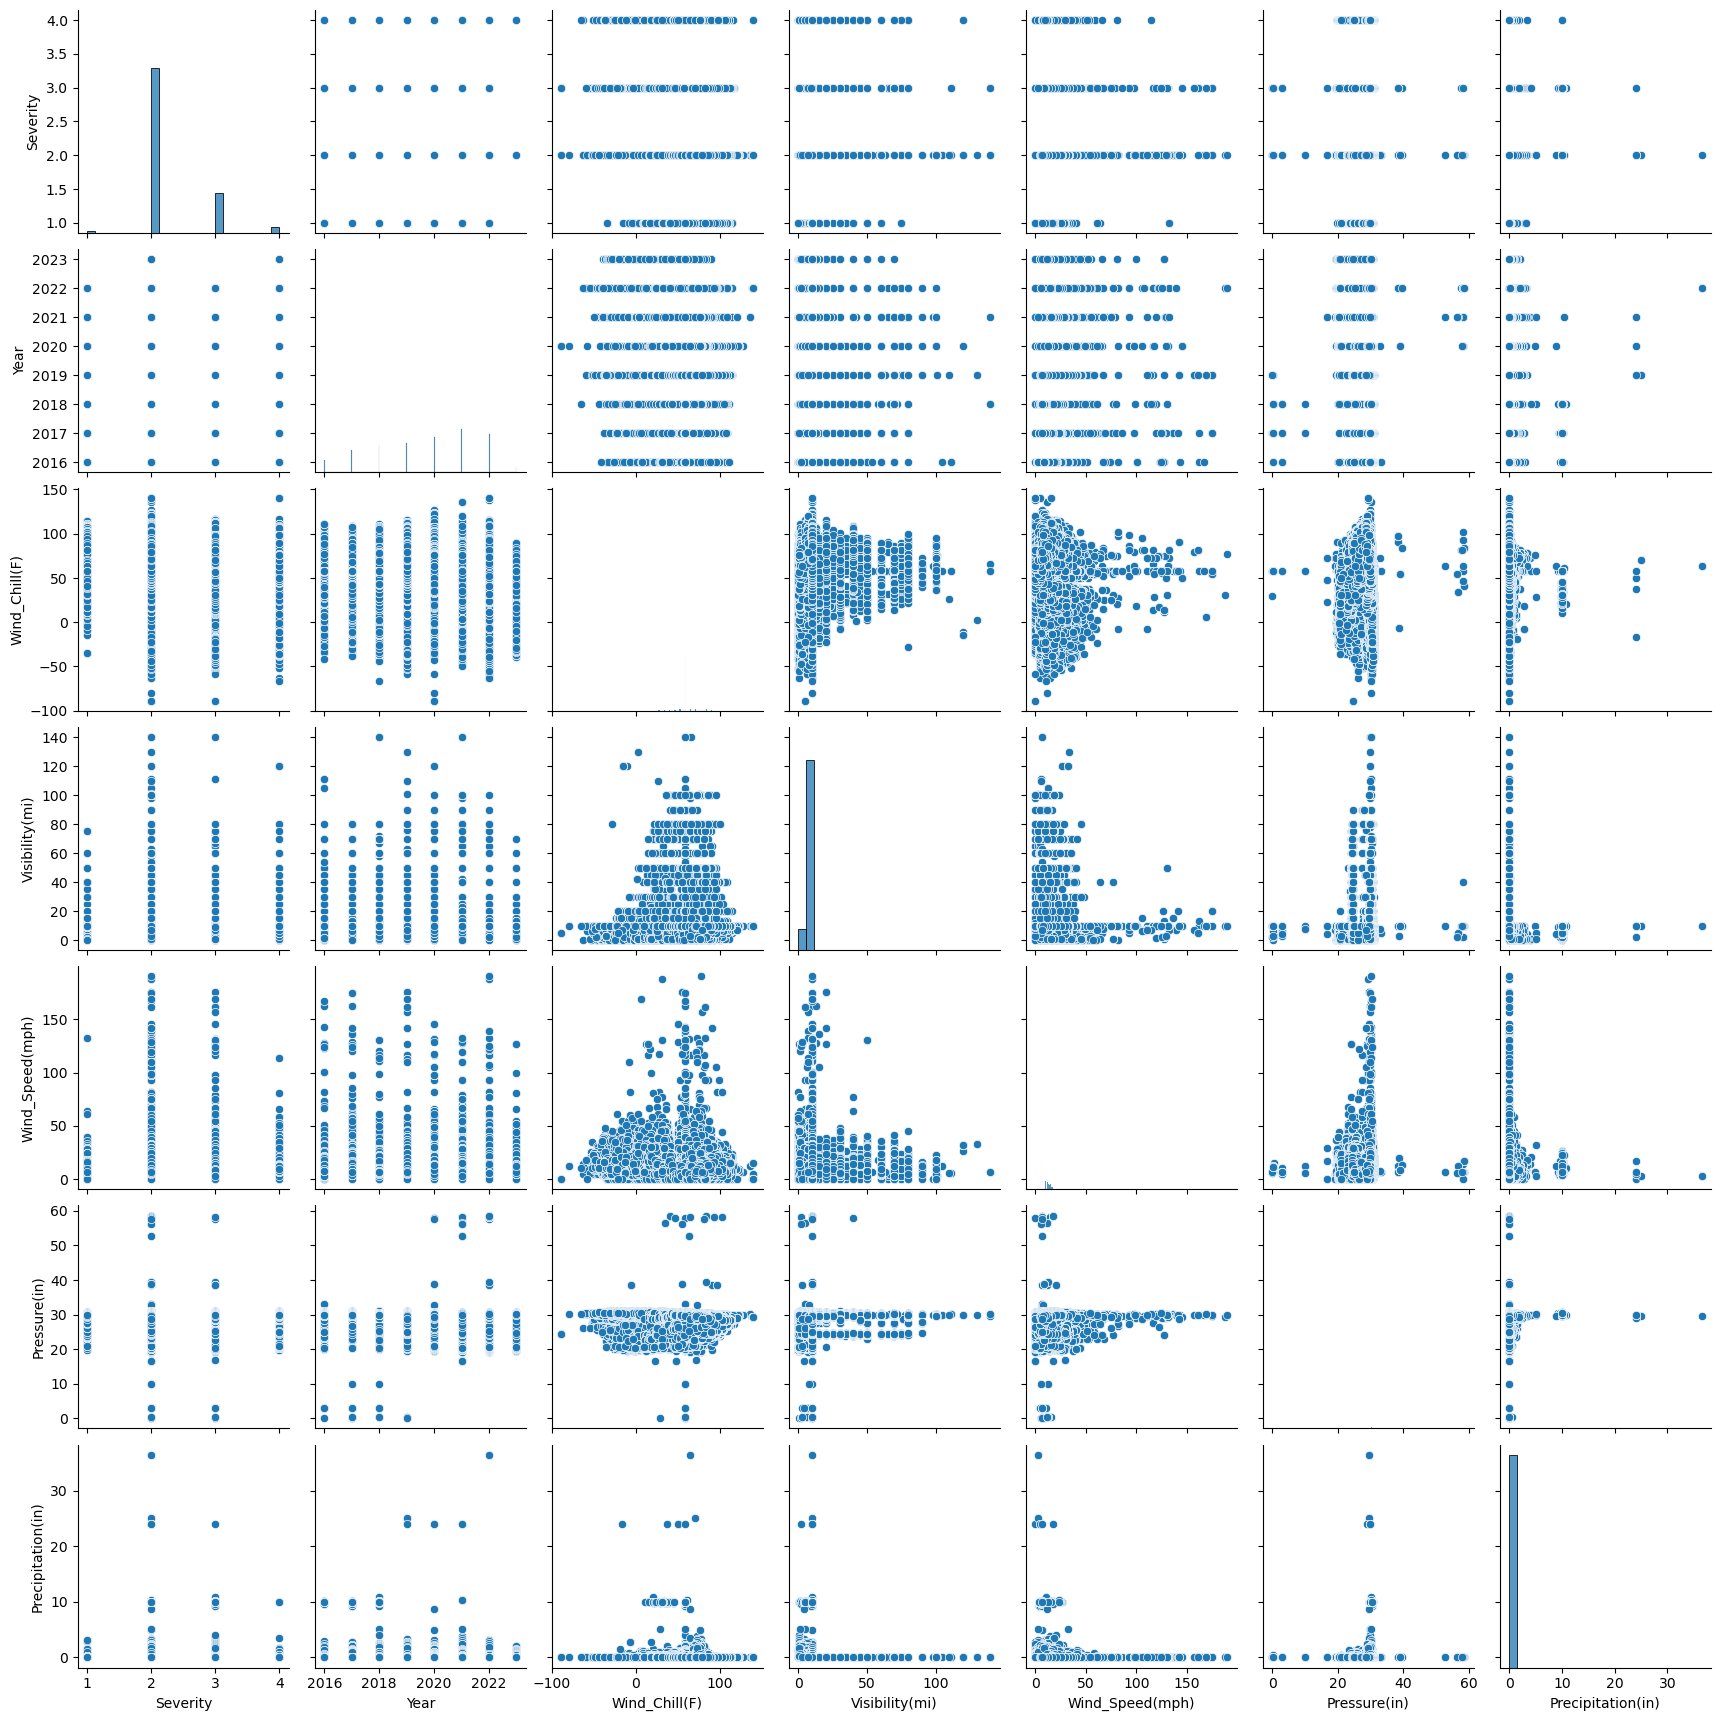

In [15]:
# Create pair plot
g = sns.pairplot(sub)

Precipitation, wind speed, and visibility seem to show some relationship with severity and number of car crashes. I would like to investigate these variables further. 

### Categorical plots

#### Categorizing the Severity Column

<Axes: xlabel='Severity', ylabel='Count'>

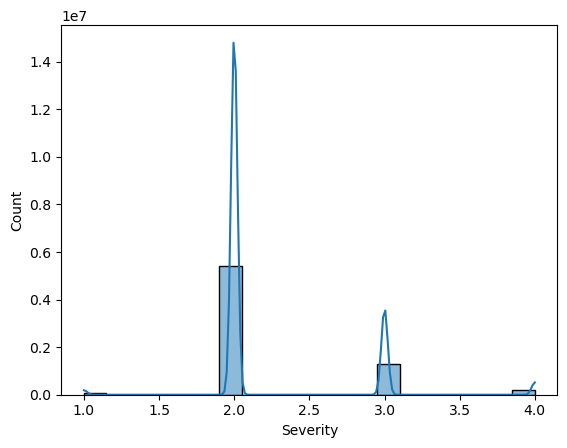

In [16]:
sns.histplot(df['Severity'], bins = 20, kde = True)

In [17]:
# Creating categorical variable for the Severity column
df.loc[df['Severity'] ==1, 'Severity Scale'] = 'Minor'

In [18]:
df.loc[df['Severity'].isin([2, 3]), 'Severity Scale'] = 'Moderate'

In [19]:
df.loc[df['Severity'] == 4, 'Severity Scale'] = 'Severe'

In [20]:
df['Severity Scale'].value_counts(dropna = False)

Severity Scale
Moderate    6725103
Severe       184364
Minor         67235
Name: count, dtype: int64

#### Categorizing the Weather Condition column

In [21]:
df.Weather_Condition.unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', 'Fair',
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow', 'Hea

In [22]:
# Define function to categorize weather conditions
def categorize_weather(condition):
    if condition in ['Clear', 'Mostly Cloudy', 'Partly Cloudy', 'Scattered Clouds', 'Shallow Fog', 'Patches of Fog', 'Light Haze', 'Light Thunderstorms and Rain']:
        return 'Clear/Partly Cloudy'
    elif condition in ['Overcast', 'Cloudy', 'Cloudy / Windy', 'Partly Cloudy / Windy', 'Mostly Cloudy / Windy', 'Fair', 'Fair / Windy', 'Mist / Windy']:
        return 'Cloudy/Overcast'
    elif condition in ['Light Rain', 'Rain', 'Heavy Rain', 'Light Rain Showers', 'Rain Showers', 'Drizzle', 'Light Drizzle', 'Light Rain Shower', 'Light Rain with Thunder', 'Thunderstorms and Rain', 'Heavy Rain Showers', 'Rain / Windy', 'Heavy Rain / Windy', 'Heavy Rain Shower', 'Rain Shower / Windy']:
        return 'Rainy/Drizzly'
    elif condition in ['Light Snow', 'Snow', 'Heavy Snow', 'Snow Grains', 'Snow Showers', 'Snow and Thunder', 'Light Snow Shower', 'Light Snow and Sleet', 'Sleet', 'Light Snow with Thunder', 'Snow and Sleet', 'Heavy Snow / Windy', 'Light Snow / Windy', 'Snow and Sleet / Windy', 'Light Snow Shower / Windy', 'Snow Showers / Windy', 'Light Ice Pellets', 'Ice Pellets', 'Heavy Freezing Rain', 'Light Freezing Rain', 'Heavy Freezing Rain', 'Freezing Rain']:
        return 'Snow/Ice'
    elif condition in ['Haze', 'Fog', 'Light Fog', 'Shallow Fog / Windy', 'Patches of Fog / Windy', 'Mist', 'Light Freezing Fog', 'Drizzle and Fog', 'Fog / Windy']:
        return 'Fog/Mist'
    elif condition in ['Blowing Sand', 'Blowing Dust', 'Blowing Dust / Windy', 'Blowing Snow', 'Blowing Snow / Windy', 'Blowing Snow / Windy', 'Sand / Dust Whirlwinds', 'Sand / Dust Whirlwinds / Windy', 'Duststorm', 'Sand / Dust Whirls Nearby', 'Thunder / Windy', 'Rain Showers / Windy', 'Drifting Snow / Windy']:
        return 'Windy/Blowing'
    elif condition in ['Tornado', 'Funnel Cloud', 'Thunderstorm', 'Heavy Thunderstorms and Rain', 'Heavy Thunderstorms and Snow', 'Thunderstorms and Snow', 'Light Thunderstorms and Snow', 'Heavy Sleet and Thunder', 'Thunder and Hail', 'Thunderstorm / Windy', 'Heavy T-Storm / Windy', 'Heavy T-Storm', 'Thunder / Wintry Mix', 'Heavy Snow with Thunder', 'Heavy Freezing Drizzle', 'Freezing Drizzle', 'Sleet and Thunder']:
        return 'Severe Weather'
    else:
        return 'Other'

# Apply the function to create the 'Weather_Category' column
df['Weather_Category'] = df['Weather_Condition'].apply(categorize_weather)

In [23]:
df['Weather_Category'] = df['Weather_Condition'].apply(categorize_weather)

In [24]:
print(df[['Weather_Condition', 'Weather_Category']].head())

  Weather_Condition     Weather_Category
0        Light Rain        Rainy/Drizzly
1        Light Rain        Rainy/Drizzly
2          Overcast      Cloudy/Overcast
3     Mostly Cloudy  Clear/Partly Cloudy
4     Mostly Cloudy  Clear/Partly Cloudy


#### Grouping weather categories by top 10 to create a plot showing severity by weather category

In [25]:
# Count the occurrences of each weather category
top_weather_categories = df['Weather_Category'].value_counts().nlargest(10).index

In [26]:
# Filter the DataFrame to include only the top 10 weather categories
filtered_df = df[df['Weather_Category'].isin(top_weather_categories)]

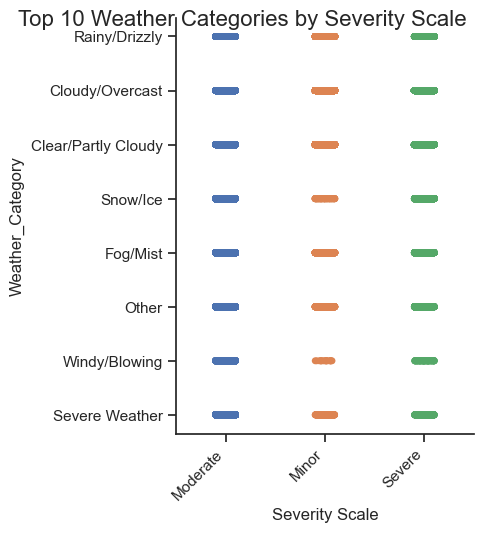

In [27]:
sns.set(style="ticks")
g = sns.catplot(x="Severity Scale", y="Weather_Category", hue="Severity Scale", data=filtered_df)
g.set_xticklabels(g.ax.get_xticklabels(), rotation=45, ha="right")
g.fig.suptitle('Top 10 Weather Categories by Severity Scale', fontsize=16)
plt.show()

Precipitation seems to affect the severity of accidents, not so much the number of accidents.

#### Categorizing Temperature Ranges

In [28]:
# Define function to categorize temperature
def categorize_temperature(temp):
    if temp <= 32:  # Below or equal to freezing point (32°F)
        return 'Freezing'
    elif 33 <= temp <= 60:  # Moderate temperatures
        return 'Moderate'
    else:  # Above 60°F
        return 'Hot'

In [29]:
# Apply the function to create a new column 'Temperature_Category'
df['Temperature_Category'] = df['Temperature(F)'].apply(categorize_temperature)

C:\Users\ariel\AppData\Local\Temp\ipykernel_3140\1874585253.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Temperature_Category', data=df, palette='coolwarm')


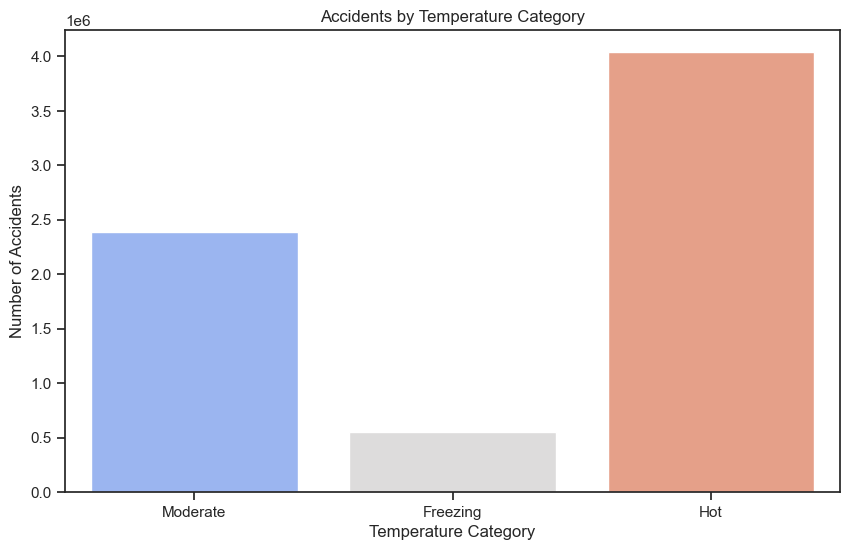

In [30]:
# Plot the accidents by temperature category
plt.figure(figsize=(10, 6))
sns.countplot(x='Temperature_Category', data=df, palette='coolwarm')
plt.title('Accidents by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Number of Accidents')
plt.show()

This is very interesting and not what expected. I am not sure why hot weather would contribute to higher number of accidents.

#### Creating a column for hour and then categorizing by morning, day, and night

In [45]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [46]:
# Extracting hour from the Start Time column and creating a new Hour column
df['Hour'] = df['Start_Time'].dt.hour

In [48]:
print(df[['Start_Time', 'Hour']].head())

           Start_Time  Hour
0 2016-02-08 05:46:00     5
1 2016-02-08 06:07:59     6
2 2016-02-08 06:49:27     6
3 2016-02-08 07:23:34     7
4 2016-02-08 07:39:07     7


In [49]:
# Function to categorize the hour into morning, day, or night
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Day'
    else:
        return 'Night'

In [50]:
# Apply the function to create a new column 'Time_of_Day'
df['Time_of_Day'] = df['Hour'].apply(categorize_hour)

In [51]:
print(df[['Hour', 'Time_of_Day']].head())

   Hour Time_of_Day
0     5       Night
1     6     Morning
2     6     Morning
3     7     Morning
4     7     Morning


In [52]:
# Car accidents by time of day
time_of_day_counts = df['Time_of_Day'].value_counts()

C:\Users\ariel\AppData\Local\Temp\ipykernel_3140\288690998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values, palette="viridis")


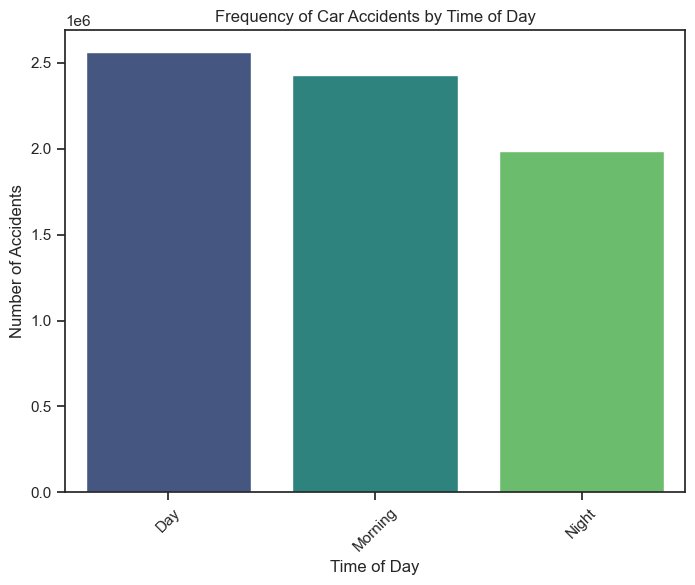

In [53]:
plt.figure(figsize=(8, 6))
sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values, palette="viridis")
plt.title('Frequency of Car Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45) 
plt.show()

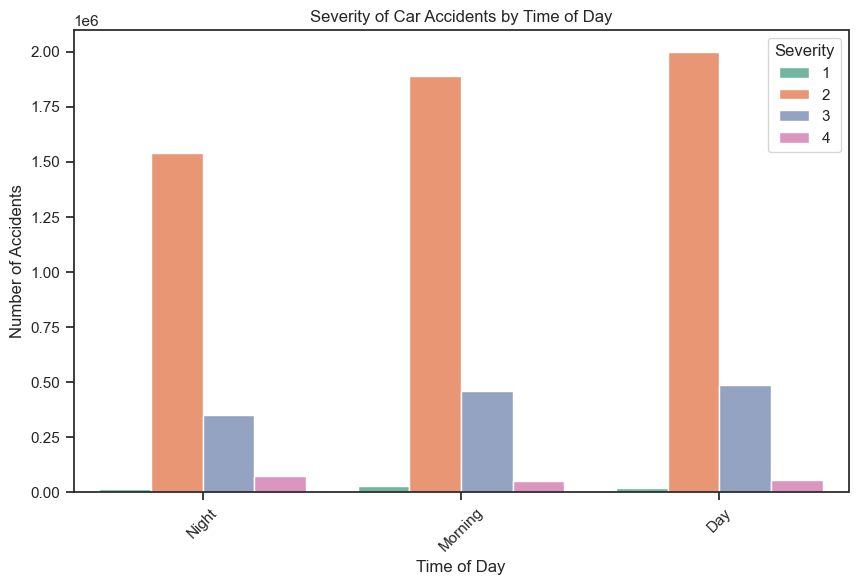

In [54]:
# Severity of accidents by time of day
plt.figure(figsize=(10, 6))
sns.countplot(x='Time_of_Day', hue='Severity', data=df, palette="Set2")
plt.title('Severity of Car Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity', loc='upper right')
plt.xticks(rotation=45) 
plt.show()

### Extra exploratory graphs

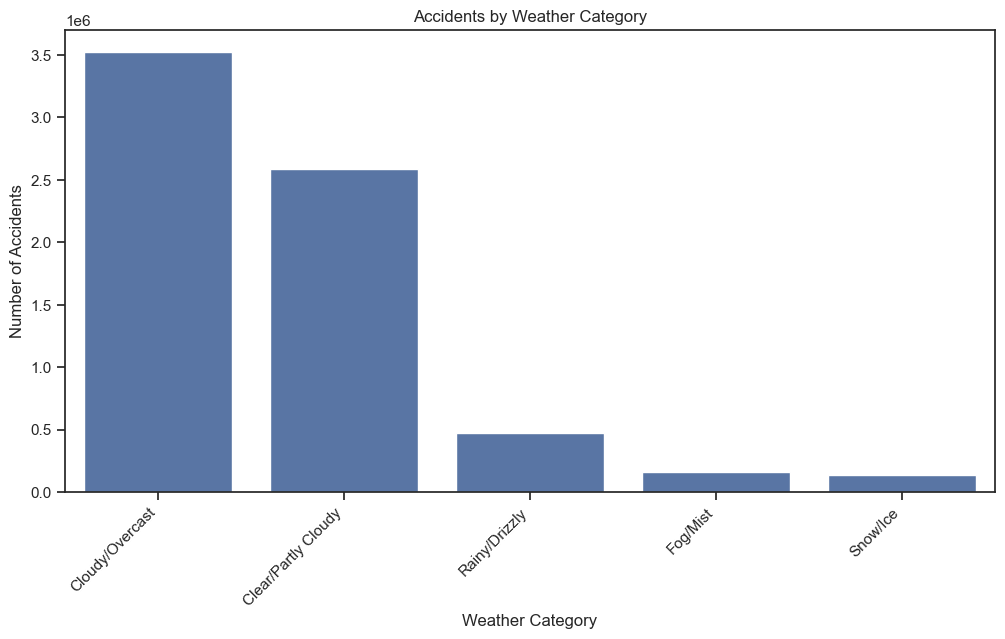

In [31]:
# Accidents by 5 most frequent weather categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather_Category', data=df, order=df['Weather_Category'].value_counts().index[:5])
plt.title('Accidents by Weather Category')
plt.xlabel('Weather Category')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  
plt.show()

C:\Users\ariel\AppData\Local\Temp\ipykernel_3140\988438483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='coolwarm')


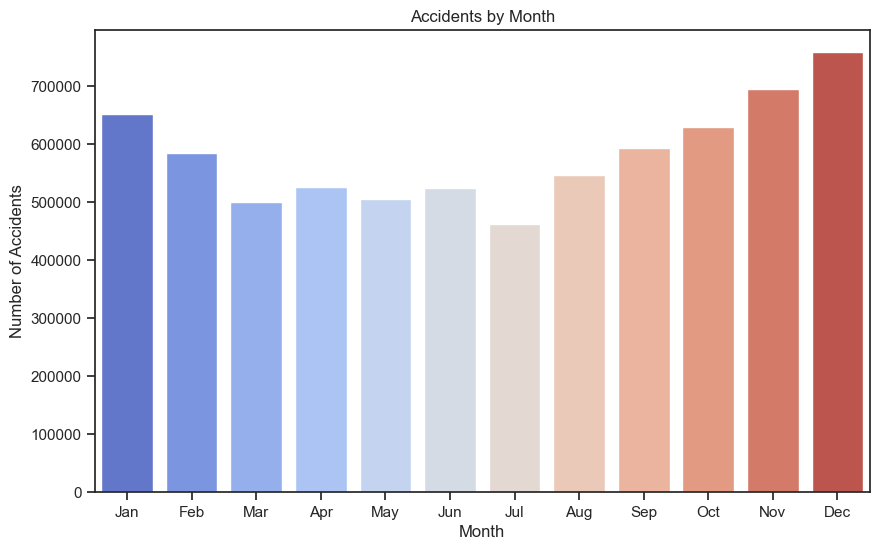

In [32]:
# Accidents by Month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='coolwarm')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

There seems to be a relationship between the late fall to winter months and number of accidents. Mainly December. This would usually point to weather and road conditions like snow and ice affecting car accident frequencies. This could be supported by cloudy/overcast being the most frequent weather condition during accidents, but the temperature analysis does not support this.

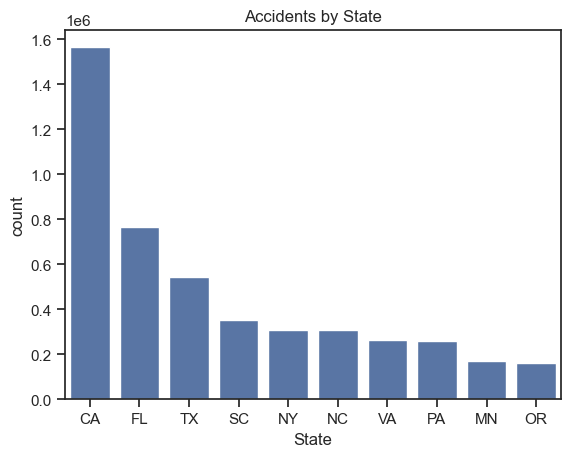

In [33]:
# Accidents by State
sns.countplot(x='State', data=df, order=df['State'].value_counts().index[:10])
plt.title('Accidents by State')
plt.show()

California is the top state for car accidents. This is also most likely due to high population.

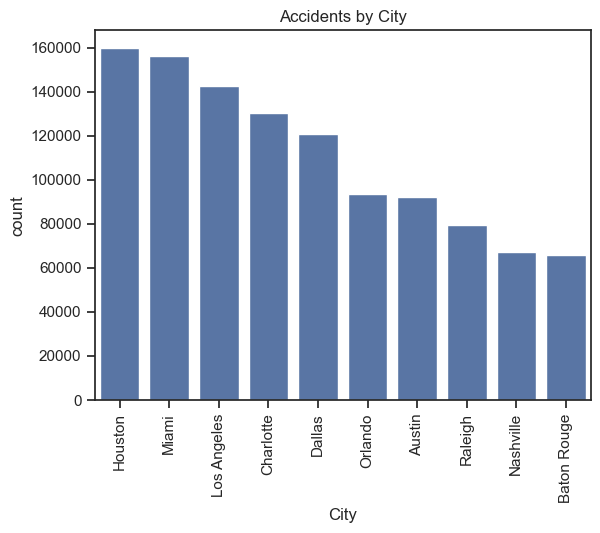

In [34]:
# Accidents by City
sns.countplot(x='City', data=df, order=df['City'].value_counts().index[:10])  # Top 10 cities with the most accidents
plt.title('Accidents by City')
plt.xticks(rotation=90)
plt.show()

In [55]:
# Group by 'City' and 'Street' and count the number of accidents
accidents_by_street_city = df.groupby(['City', 'Street']).size().reset_index(name='Accident_Count')

In [56]:
# Display the top 5 cities with streets having the highest number of accidents
top_street_city_accidents = accidents_by_street_city.sort_values(by='Accident_Count', ascending=False).head(5)

In [57]:
print(top_street_city_accidents)

               City  Street  Accident_Count
330036        Miami  I-95 S            9305
330035        Miami  I-95 N            8666
303680  Los Angeles  I-10 E            6879
243461      Houston  I-45 N            6752
303682  Los Angeles  I-10 W            6681


Car accidents are most frequent on interstates!

#### Frequency of car accidents depending on presence or absence of traffic aids

In [35]:
# List of categorical columns
categorical_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
                       'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
                       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

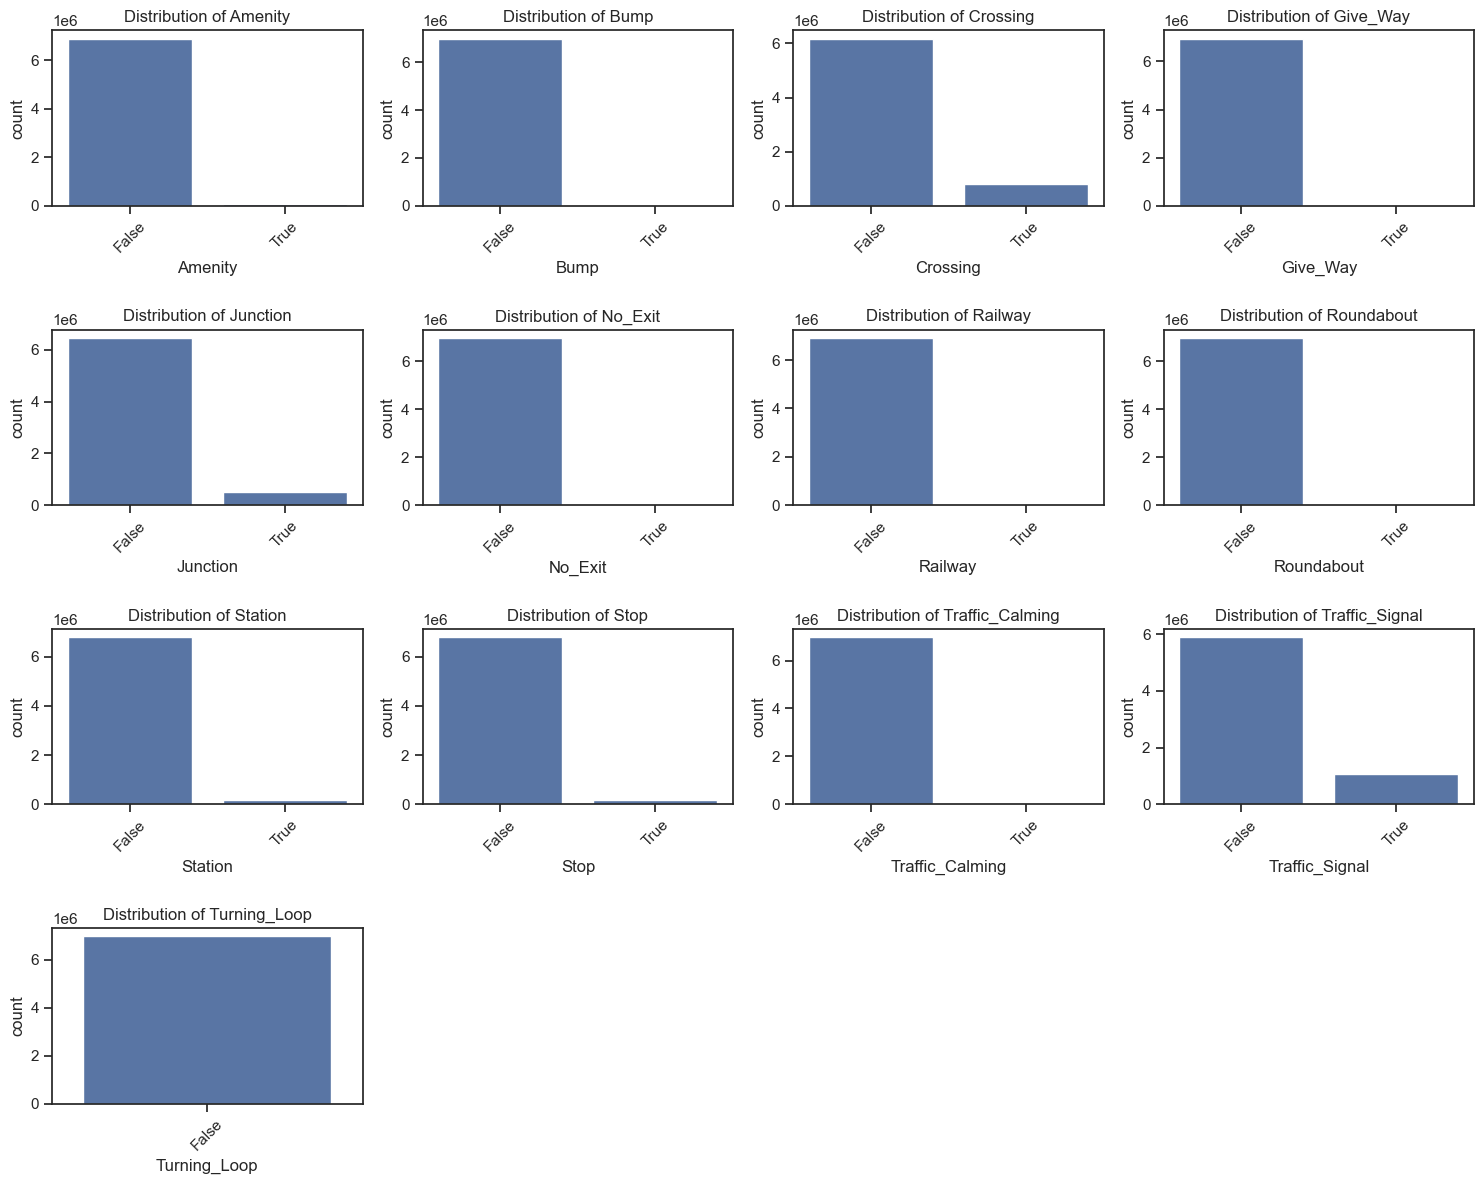

In [36]:
# Plotting each categorical variable
plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)  
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

This shows a significant difference between car accidents with or without traffic aiding measures. Car crashes are significantly higher where the traffic aiding measures are not present. 

#### Answered Questions

•	Are accidents more likely to occur during specific weather conditions (rain, snow)? 
Weather seems to not be a key factor in car accident rates. Perhaps nice weather when more people are on the road, and not as cautious of their speed and their surroundings is the issue. This is something to explore further.

•	What geographical areas have the highest accident rates? California, Florida, and Texas have the highest frequencies of car accidents, more specifically in some of their largest cities of Los Angeles, Miami, and Houston

•	What factors contribute most to the severity of accidents? Rainy weather seems to contribute the most to severity of accidents, but no real effect on the frequency of the accidents. 

•	How do number of accidents change between seasons? Winter months have the highest number of accidents, however the temperature variable and the weather category variable seem to suggest that snow and ice are not a big contributing factor.

•	Do areas with more traffic calming measures (speed bumps, roundabouts) have fewer accidents? Significantly fewer.

Question to explore: How does severity of accidents differ by geographic region?

### Hypotheses

Hypothesis 1: There is a significant difference in the number of car accidents between interstates and non-interstates, with interstates having more accidents.

Hypothesis 2: Rainy weather has a significant effect on the severity of car accidents.

Hypothesis 3: Car accidents are more frequent during rush hours compared to non-rush hours.

Hypothesis 4: Higher frequency of car accidents during the winter months are not caused by inclement weather.

#### Exporting Data Set with new columns (Severity Scale, Weather Condition, Temperature Category, Hour, and Time of Day)

In [58]:
df.columns

Index(['Unnamed: 0', 'ID', 'Source', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Year', 'Month', 'Day', 'Severity Scale',
       'Weather_Category', 'Temperature_Category', 'Hour', 'Time_of_Day'],
      dtype='object')

In [59]:
df.to_csv(os.path.join(path, 'Data','cardata.derived.csv'))